<a href="https://colab.research.google.com/github/dmscornjs/Hotelreview/blob/main/%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install konlpy
!pip install wordcloud
!pip install gensim
```


*   클러스터링




코랩 런타임 끊기지 않고 하는 법



```
function ClickConnect(){ console.log("Working"); document.querySelector("colab-toolbar-button").click() }setInterval(ClickConnect, 1800000)

```





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install konlpy
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 59.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/최종합친호텔리뷰.csv")
sent= pd.read_csv("/content/drive/MyDrive/호텔감성분석확률.csv")
top = pd.read_csv("/content/drive/MyDrive/야놀자명사100.csv",encoding='utf-8',delimiter="\t",header = None )
ttt = pd.read_csv("위치.txt",header = None)

In [ ]:
in_file = open("stations.txt",'rt', encoding='UTF8')
stations = []
for line in in_file:
    data = line.strip().split(" - ")
    stations+=data

In [ ]:
df_sent = sent.loc[:,['sentiment','sent_proba']] 

In [ ]:
top = top[:100]
top.columns=["n", "c", "t"]

In [ ]:
top.t.value_counts()

0    36
1    30
2    13
5    11
3     7
4     3
Name: t, dtype: int64

In [ ]:
n1 = list(top.n.loc[top.t==1])
n2 = list(top.n.loc[top.t==2])
n3 = list(top.n.loc[top.t==3])
n4 = list(top.n.loc[top.t==4])

In [ ]:
lt = ttt[0].values.tolist()

In [ ]:
n3+=lt
n3+=stations

In [ ]:
n3 = list(set(n3))

In [ ]:
n3

[' 녹번',
 ' 수리산',
 '의정부중앙',
 ' 신정네거리',
 ' 신촌',
 ' 상갈',
 '석남',
 '온양온천',
 ' 금호',
 ' 캠퍼스타운',
 '화계',
 ' 양수',
 '구산',
 ' 우장산',
 '테크노파크',
 '검단사거리',
 ' 석촌',
 ' 산성',
 '동묘앞',
 ' 홍제',
 '인천시청',
 ' 을지로입구',
 '두정',
 '시장',
 '여의도',
 '남대문',
 '가까워',
 ' 구로디지털단지',
 ' 인천대입구',
 ' 신원',
 '화곡',
 '솔밭공원',
 '이동',
 ' 녹양',
 '구로',
 ' 학여울',
 ' 상봉',
 '중앙보훈병원',
 '연수',
 '동대문',
 '온수',
 ' 범계',
 ' 관악',
 ' 왕십리',
 '효창공원앞',
 '상도',
 '광화문',
 ' 용산',
 '이태원',
 ' 삼각지',
 ' 죽전',
 ' 아신',
 '동백',
 ' 송정',
 '광운대',
 '불광',
 '신대방삼거리',
 '마두',
 ' 금촌',
 '신창',
 ' 마포',
 '남영',
 '올림픽공원',
 ' 금곡',
 ' 정왕',
 ' 보문',
 '인천공항2터미널',
 '화전',
 '당산',
 ' 잠실',
 ' 일원',
 '교통',
 ' 방학',
 '가깝',
 '부천시청',
 '지행',
 '청구',
 '백양리',
 ' 서초',
 ' 창동',
 ' 중랑',
 '광나루',
 '김포공항',
 '동두천',
 ' 오류동',
 ' 계양',
 '둔촌오륜',
 '부천종합운동장',
 ' 경찰병원',
 ' 부평구청',
 ' 청명',
 '위치',
 '용문',
 ' 반포',
 ' 구성',
 ' 역삼',
 '한대앞',
 ' 대치',
 ' 양재시민의숲',
 '보평',
 '신촌',
 '영등포시장',
 '운연',
 ' 가양',
 '거리',
 ' 세류',
 ' 석계',
 '양평',
 ' 매봉',
 ' 단대오거리',
 ' 대성리',
 ' 중화',
 '석촌고분',
 '검단오류',
 ' 문산',
 ' 신금호',
 ' 삼산체육관',
 ' 중동',
 '종로3가',
 '

In [ ]:
df['시설']=0
df['서비스']=0
df['위치']=0
df['가격']=0

In [ ]:
df

,hotel,star,review,date,real_date,length,review_spell_check,site,시설,서비스,위치,가격
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,0,0,0,0,0
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳굳굳굳,0,0,0,0,0
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0,0,0,0,0
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...,0,0,0,0,0
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예뻤어요,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237445,뜨랑블루 호텔,2,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1,0,0,0,0
237446,뜨랑블루 호텔,5,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1,0,0,0,0
237447,뜨랑블루 호텔,5,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1,0,0,0,0
237448,뜨랑블루 호텔,5,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1,0,0,0,0


In [ ]:
for x in n1:
  df['시설'][df.review_spell_check.str.contains(x)]+=df.review_spell_check.str.count(x)
for x in n2:
  df['서비스'][df.review_spell_check.str.contains(x)]+=df.review_spell_check.str.count(x)
for x in n3:
  df['위치'][df.review_spell_check.str.contains(x)]+=df.review_spell_check.str.count(x)
for x in n4:
  df['가격'][df.review_spell_check.str.contains(x)]+=df.review_spell_check.str.count(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying

In [ ]:
df_new = df.loc[:,['시설', '서비스', '위치', '가격']].max(axis=1)

In [ ]:
df['label'] = 0

In [ ]:
df.label.loc[df['시설']==df_new]=1
df.label.loc[df['서비스']==df_new]=2
df.label.loc[df['위치']==df_new]=3
df.label.loc[df['가격']==df_new]=4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.label.loc[df_new==0]=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#토픽 위치 추가 후
df.label.value_counts()

0    77677
1    77466
2    47305
3    25372
4     9630
Name: label, dtype: int64

In [ ]:
#역명 정보 추가 후
df.label.value_counts()

0    76984
1    74596
2    45809
3    31146
4     8915
Name: label, dtype: int64

In [ ]:
df.describe()

,star,length,site,시설,서비스,위치,가격,label
count,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000
mean,4.635641,57.506161,0.483799,1.554218,0.856500,0.686966,0.131998,1.243681
std,0.744728,76.847789,0.499739,2.443693,1.522661,1.561282,0.470919,1.149058
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,23.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,66.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000
max,5.000000,500.000000,1.000000,60.000000,25.000000,41.000000,36.000000,4.000000


# 분류 지도학습

In [ ]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.review_spell_check, df.label, test_size=0.3, shuffle=True, stratify=df.label, random_state=777)

In [ ]:
y_train.value_counts()

0    53889
1    52217
2    32066
3    21802
4     6241
Name: label, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(x_train) # countvectorizer 학습
X = vectorizer.transform(x_train) # transform

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#입력해서 확인하는 용도
#run model
X_pred = vectorizer.transform([input()]) 
y_pred = model.predict(X_pred)
print(y_pred)

가격 대비 괜찮네요
[4]


In [ ]:
model.score(X, y_train)

0.9778299190807087

In [ ]:
#run model
X_pred = vectorizer.transform(x_test) 
y_pred = model.predict(X_pred)

In [ ]:
model.score(X_pred, y_test)

0.9209517793219625

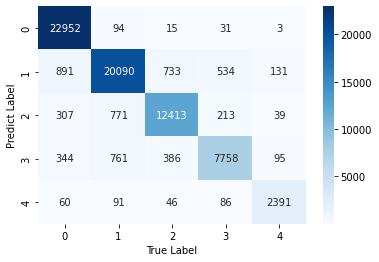

In [ ]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('True Label')
plt.ylabel('Predict Label')
plt.show()

In [ ]:
df_train = df.review_spell_check

In [ ]:
#run model
df_vec= vectorizer.transform(df_train) 
l_pred = model.predict(df_vec)
proba = model.predict_proba(df_vec)

In [ ]:
df_proba= pd.DataFrame(proba)

In [ ]:
df_proba

,0,1,2,3,4
0,3.874113e-05,0.922787,0.068350,8.489839e-03,3.334874e-04
1,9.811697e-01,0.006099,0.005713,4.876576e-03,2.141469e-03
2,1.694947e-06,0.999445,0.000018,5.338017e-04,8.318019e-07
3,9.436890e-09,0.999912,0.000014,7.195487e-05,1.896939e-06
4,2.520743e-02,0.882314,0.032072,4.726061e-02,1.314650e-02
...,...,...,...,...,...
237445,7.543127e-07,0.999801,0.000024,1.561764e-04,1.834974e-05
237446,1.853394e-03,0.013259,0.936564,4.551936e-02,2.803765e-03
237447,2.309130e-01,0.759288,0.002379,6.161991e-03,1.258047e-03
237448,2.890378e-10,0.999997,0.000002,5.563171e-07,1.298812e-07


In [ ]:
label_prob = df_proba.max(axis=1)

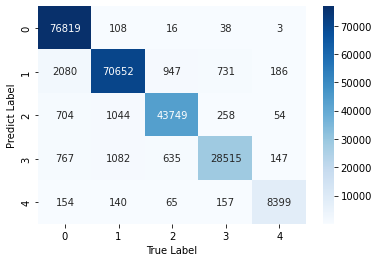

In [ ]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
cm = confusion_matrix(df.label,l_pred)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('True Label')
plt.ylabel('Predict Label')
plt.show()

In [ ]:
model.score(df_vec, df.label)

0.9607664771530848

In [ ]:
df['label_pred'] = l_pred

In [ ]:
df['label_proba'] = label_prob

In [ ]:
df['sentiment']= sent['sentiment']
df['sent_proba'] = sent['sent_proba']

In [ ]:
df.describe()

,star,length,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba
count,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,2.374500e+05
mean,4.635641,57.506161,0.483799,1.554218,0.856500,0.686966,0.131998,1.243681,1.213321,0.926556,0.785172,7.022491e-01
std,0.744728,76.847789,0.499739,2.443693,1.522661,1.561282,0.470919,1.149058,1.148170,0.102708,0.410704,3.023777e-01
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280929,0.000000,1.531017e-18
25%,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.916623,1.000000,5.535977e-01
50%,5.000000,23.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.961131,1.000000,8.077600e-01
75%,5.000000,66.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.993543,1.000000,9.426238e-01
max,5.000000,500.000000,1.000000,60.000000,25.000000,41.000000,36.000000,4.000000,4.000000,1.000000,1.000000,1.000000e+00


In [ ]:
df.to_csv("호텔리뷰모델포함.csv", index=False)

# 서비스 형태 (시도중)

In [ ]:
df = pd.read_csv("호텔리뷰모델포함.csv")

In [ ]:
df.groupby(['hotel']).mean().sort_values(['sentiment'])

,star,length,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba
hotel,,,,,,,,,,,,
메이원호텔,4.000000,78.750000,1.0,3.000000,0.250000,2.500000,0.500000,1.000000,1.000000,0.973024,0.250000,0.369443
서울시티호텔,3.576923,67.307692,1.0,1.807692,0.807692,1.346154,0.500000,2.269231,2.000000,0.933135,0.269231,0.305602
명동 이코노미 호텔 프리미어,3.629630,78.333333,1.0,2.481481,0.814815,0.814815,0.407407,1.518519,1.629630,0.946582,0.333333,0.371095
명동 뉴 스테이 인,4.102564,36.435897,0.0,1.051282,0.102564,0.641026,0.230769,1.000000,0.948718,0.915728,0.333333,0.380198
명동 MUST STAY HOTEL,3.304348,87.217391,1.0,2.217391,0.956522,0.739130,0.304348,1.826087,1.869565,0.908069,0.347826,0.395280
...,...,...,...,...,...,...,...,...,...,...,...,...
조선 팰리스 서울 강남 럭셔리 컬렉션,4.888889,161.655556,1.0,3.488889,2.777778,0.633333,0.233333,1.311111,1.322222,0.967908,0.922222,0.886289
로이넷호텔 서울 마포,4.866667,40.600000,0.0,1.533333,0.400000,0.066667,0.000000,0.933333,0.933333,0.947418,0.933333,0.801742
호텔28 명동,4.916667,147.958333,1.0,3.958333,1.958333,1.791667,0.208333,1.687500,1.687500,0.933411,0.958333,0.882087


In [ ]:
gg = df.groupby(['hotel','label']).mean()

In [ ]:
df.hotel.value_counts()

신라스테이 구로          9261
글래드 마포            7245
신라스테이 마포          6651
노보텔 앰배서더 서울 용산    5513
롯데시티호텔 명동         5138
                  ... 
메이원호텔                4
사월 호텔                3
마리호텔                 2
유에이치 스위트 더 서울        1
종로 호텔팝 리즈 프리미어       1
Name: hotel, Length: 291, dtype: int64

In [ ]:
df.loc[zz.hotel<100]

IndexingError: ignored

In [ ]:
z = df.hotel.value_counts()

In [ ]:
zz = pd.DataFrame(z)
zzz = zz.loc[zz.hotel<100]

In [ ]:
zzzz = zzz.reset_index(drop=False)

In [ ]:
zzzzz = zzzz['index'].tolist()

In [ ]:
zzzzz

['라인 호텔 명동',
 'G2 호텔 명동',
 '호텔티롤',
 '스테이 인',
 '조선 팰리스 서울 강남 럭셔리 컬렉션',
 '더 플라자',
 '호텔 컬리넌 왕십리',
 '크라운 파크 호텔',
 '힐튼 가든인 서울 강남',
 '스탠포드 호텔 명동',
 '호텔 더 디자이너스 DDP',
 '나인스 호텔',
 'JS호텔',
 'Staz 스타즈 호텔 명동 2호점',
 '메리어트 여의도 MEA',
 '파라스파라 서울',
 '케이팝호텔 서울역',
 '역삼 아르누보씨티 호텔앤레지던스',
 '머스트스테이 호텔 선유도역점',
 '오크우드 프리미어 코엑스센터',
 '호텔 부티크나인',
 '호텔 디 아티스트 연신내점',
 '더 스테이',
 '신촌 라뉘호텔',
 '호텔28 명동',
 '영빈호텔',
 '호텔 세느',
 '명동 뉴 스테이 인',
 '호텔코지 명동',
 '불광 포레스타 호텔',
 '글로벌인 동대문 시티데이즈 인',
 '앰배서더 서울 풀만 호텔',
 '호텔 프린스',
 '합정 써클호텔',
 '명동 이코노미 호텔 프리미어',
 '아마레호텔',
 '호텔 파이 종로',
 '서울시티호텔',
 '디어스명동',
 '제리스 플래닛',
 '명동 MUST STAY HOTEL',
 '리안 호텔',
 '호텔 디 아티스트 성신여대점',
 '에이큐브 호텔',
 '메트로 호텔',
 '호텔 컬리넌 개포',
 '노원 리츠호텔',
 '잠실(방이2호)호텔 더 캐슬',
 '로이넷호텔 서울 마포',
 '유에이치스위트 광화문',
 '이코노미호텔 명동 프리미어점',
 '풀리 미니호텔',
 '플렉스 레지던스',
 'AC 호텔 바이 메리어트 서울 강남',
 '유에이치스위트 더 명동',
 '신촌 메이저 호텔',
 '천호 호텔 더 블루',
 '호텔 컬리넌 건대2',
 '호텔인카페 독산점',
 '메이원호텔',
 '사월 호텔',
 '마리호텔',
 '유에이치 스위트 더 서울',
 '종로 호텔팝 리즈 프리미어']

In [ ]:
for i in zzzzz:
  gg.drop(labels = str(i), axis=0, inplace = True)

In [ ]:
gg.sort_values(['sentiment'])[gg.label == 1]

NameError: ignored

In [ ]:
df.groupby(['hotel']).mean()

,star,length,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba
hotel,,,,,,,,,,,,
AC 호텔 바이 메리어트 서울 강남,4.250000,55.750000,0.0,2.000000,0.500000,0.500000,0.000000,0.750000,0.750000,0.975829,0.500000,0.473961
L7 강남 바이 롯데,4.774823,27.734043,0.0,0.714539,0.458777,0.343972,0.042110,0.945922,0.911791,0.926880,0.853723,0.728860
노보텔 앰배서더 동대문 호텔 & 레지던스,4.775229,37.539318,0.0,1.074050,0.697903,0.287025,0.058978,1.030799,0.998689,0.923882,0.858453,0.749086
노보텔 앰배서더 서울 용산,4.722133,31.720302,0.0,0.809796,0.521401,0.298466,0.059968,0.970245,0.929503,0.923594,0.836805,0.719240
로이넷호텔 서울 마포,4.777778,41.222222,0.0,1.444444,0.444444,0.111111,0.000000,1.000000,1.000000,0.933800,0.888889,0.764857
몬드리안 서울 이태원(Mondrian Seoul Itaewon),4.692449,39.775322,0.0,1.355433,0.646409,0.250460,0.044199,0.966851,0.941068,0.920516,0.812155,0.709605
신라스테이 역삼,4.628127,26.095527,0.0,0.672100,0.429113,0.254359,0.045489,0.896892,0.858984,0.928480,0.794162,0.678210
카파스 호텔,4.422753,34.613764,0.0,1.025281,0.462079,0.248596,0.129213,1.012640,0.980337,0.922496,0.734551,0.641411
카푸치노 호텔,4.606667,33.977303,0.0,1.070761,0.312417,0.259012,0.038718,0.790387,0.746328,0.930809,0.771696,0.661718


In [ ]:
df.hotel.loc[df.hotel=='ENA 스위트호텔 남대문']='ENA 스위트 호텔 남대문'
df.hotel.loc[df.hotel=='SR호텔 서울 마곡']='SR 호텔 서울 마곡'
df.hotel.loc[df.hotel=='노보텔 앰배서더 동대문 호텔&레지던스']='노보텔 앰배서더 동대문 호텔 & 레지던스'
df.hotel.loc[df.hotel=='라이즈 오토그래프 컬렉션 바이메리어트']= '라이즈 오토그래프 컬렉션 바이 메리어트'
df.hotel.loc[df.hotel=='롯데호텔 서울 이그제큐티브타워'] = '롯데 호텔 서울'
df.hotel.loc[df.hotel=='소피텔 앰배서더 서울 호텔 & 서비스드 레지던스']='소피텔 앰배서더 서울'
df.hotel.loc[df.hotel=='솔라리아 니시테츠 호텔 명동']= '솔라리아 니시테츠 명동'
df.hotel.loc[df.hotel=='몬드리안 서울 이태원(Mondrian Seoul Itaewon)'] = '몬드리안 서울 이태원'
df.hotel.loc[df.hotel=='이비스 앰배서더 서울 명동'] = '이비스 앰배서더 명동'
df.hotel.loc[df.hotel=='스타즈호텔 독산'] = '스타즈 호텔 독산'
df.hotel.loc[df.hotel=='호텔 리베라 청담'] = '호텔 리베라'
df.hotel.loc[df.hotel=='홍대 나인브릭호텔']='홍대 나인브릭 호텔'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
set(list(df.hotel))

{'AC 호텔 바이 메리어트 서울 강남',
 'ENA 스위트 호텔 남대문',
 'Ever 8 신촌',
 'G2 호텔 명동',
 'JK 블라썸 호텔',
 'JS호텔',
 'L7 강남 바이 롯데',
 'L7 명동 바이 롯데',
 'L7 홍대 바이 롯데',
 'SR 호텔 사당점',
 'SR 호텔 서울 마곡',
 'Staz 스타즈 호텔 명동 2호점',
 'The-K 호텔 서울',
 'WD호텔',
 '가락 호텔',
 '강남 스테이호텔',
 '골드리버 호텔',
 '그랜드 머큐어 앰배서더 호텔앤레지던스',
 '그랜드 워커힐 서울',
 '그랜드 인터컨티넨탈 서울 파르나스',
 '그랜드 하얏트 서울',
 '글래드 강남 코엑스센터',
 '글래드 마포',
 '글래드 여의도',
 '글로벌인 동대문 시티데이즈 인',
 '나이아가라 호텔',
 '나인스 호텔',
 '나인트리 프리미어 호텔 명동2',
 '나인트리 프리미어 호텔 인사동',
 '나인트리 호텔 동대문',
 '나인트리 호텔 명동',
 '나포레 호텔',
 '노보텔 스위트 앰배서더 서울 용산',
 '노보텔 앰배서더 강남',
 '노보텔 앰배서더 동대문 호텔 & 레지던스',
 '노보텔 앰배서더 서울 강남',
 '노보텔 앰배서더 서울 용산',
 '노원 노블레스호텔',
 '노원 리츠호텔',
 '뉴서울 호텔',
 '더 디자이너스 리즈 강남 프리미어',
 '더 리버사이드 호텔',
 '더 스테이',
 '더 스테이트 선유 호텔',
 '더 플라자',
 '더케이 호텔 서울',
 '더퍼스트스테이 (구, 루체브릿지호텔)',
 '도미인 서울강남',
 '도봉 호텔베이204',
 '동대문 바티카 호텔',
 '드어반 호텔',
 '디어스명동',
 '디어스명동 (충무로) 호텔',
 '뜨랑블루 호텔',
 '라까사호텔 서울',
 '라마다 바이 윈덤 서울 동대문',
 '라마다 서울 동대문',
 '라마다 서울 신도림',
 '라마다 호텔앤스위트 서울 남대문',
 '라비타 호텔',
 '라이즈 오토그래프 컬렉션 바이 메리어트',
 '라이프스타일 S호텔',
 '라인 호텔 명동'

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X,y_train)

Learning rate set to 0.102702
0:	learn: 1.5460273	total: 3.33s	remaining: 55m 31s
1:	learn: 1.4955278	total: 6.16s	remaining: 51m 11s
2:	learn: 1.4520644	total: 9.05s	remaining: 50m 6s
3:	learn: 1.4173815	total: 11.9s	remaining: 49m 28s
4:	learn: 1.3868730	total: 14.8s	remaining: 49m 9s
5:	learn: 1.3590768	total: 17.7s	remaining: 48m 46s
6:	learn: 1.3336269	total: 20.5s	remaining: 48m 22s
7:	learn: 1.3134292	total: 23.3s	remaining: 48m 13s
8:	learn: 1.2944569	total: 27.4s	remaining: 50m 16s
9:	learn: 1.2764862	total: 32s	remaining: 52m 49s
10:	learn: 1.2605013	total: 36.9s	remaining: 55m 21s
11:	learn: 1.2461111	total: 41.4s	remaining: 56m 48s
12:	learn: 1.2326515	total: 46.7s	remaining: 59m 3s
13:	learn: 1.2212967	total: 51s	remaining: 59m 52s
14:	learn: 1.2092034	total: 54.7s	remaining: 59m 52s
15:	learn: 1.1994657	total: 57.4s	remaining: 58m 52s
16:	learn: 1.1901561	total: 1m	remaining: 58m 1s
17:	learn: 1.1806893	total: 1m 3s	remaining: 57m 20s
18:	learn: 1.1717841	total: 1m 5s	rem

In [ ]:
X_pred = vectorizer.transform(x_test) 
y_pred = model.predict(X_pred)

In [ ]:
y_pred

array([[2],
       [0],
       [3],
       ...,
       [2],
       [1],
       [2]])